In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, clear_output

In [131]:
dataset= pd.read_csv("stroke prediction.csv")
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [132]:
dataset.drop(columns=["id","Residence_type"],inplace=True)

In [133]:
dataset["gender"]=dataset["gender"].astype('category')
dataset["ever_married"]=dataset["ever_married"].astype('category')
# dataset["Residence_type"]=dataset["Residence_type"].astype('category')
dataset["work_type"]=dataset["work_type"].astype('category')
dataset["smoking_status"]=dataset.smoking_status.astype("category")

In [134]:
dataset_imputed=dataset.copy()

In [135]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()

dataset_imputed.gender=encoder.fit_transform(dataset_imputed.gender)

dataset_imputed.ever_married=encoder.fit_transform(dataset_imputed.ever_married)

dataset_imputed.work_type=encoder.fit_transform(dataset_imputed.work_type)

# dataset_imputed.Residence_type=encoder.fit_transform(dataset_imputed.Residence_type)

dataset_imputed.smoking_status=dataset_imputed.smoking_status.map({'never smoked':0,'formerly smoked':1,'smokes':2})

In [136]:
dataset_imputed

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,3.0,0,0,0,4,95.12,18.0,NaN,0
1,1,58.0,1,0,1,2,87.96,39.2,0,0
2,0,8.0,0,0,0,2,110.89,17.6,NaN,0
3,0,70.0,0,0,1,2,69.04,35.9,1,0
4,1,14.0,0,0,0,1,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...
43395,0,10.0,0,0,0,4,58.64,20.4,0,0
43396,0,56.0,0,0,1,0,213.61,55.4,1,0
43397,0,82.0,1,0,1,2,91.94,28.9,1,0
43398,1,40.0,0,0,1,2,99.16,33.2,0,0


## Undersampling

In [137]:
class_0 = dataset_imputed[dataset_imputed.stroke==0]
class_1 = dataset_imputed[dataset_imputed.stroke==1]

In [138]:
class_0_under = class_0.sample(len(class_1))
dataset_under = pd.concat([class_0_under,class_1],axis=0)
dataset_under

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
27030,1,5.0,0,0,0,4,97.26,15.8,NaN,0
36939,1,13.0,0,0,0,4,70.65,23.7,NaN,0
37672,0,65.0,0,0,1,2,212.71,28.8,1,0
28719,0,78.0,1,1,1,2,208.47,22.8,1,0
16731,1,63.0,0,0,1,2,91.30,62.9,0,0
...,...,...,...,...,...,...,...,...,...,...
43148,0,56.0,0,0,1,2,83.27,32.9,2,1
43268,1,69.0,0,0,1,3,97.36,28.0,NaN,1
43304,0,80.0,0,0,1,3,75.91,26.7,0,1
43318,1,62.0,1,1,1,2,77.97,31.5,1,1


In [139]:
X=dataset_under.drop(columns="stroke")
y=dataset_under["stroke"]

In [140]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=1/3,stratify=y)

from sklearn.impute import KNNImputer

imputer=KNNImputer()

X_train=pd.DataFrame(imputer.fit_transform(X_train),columns=X_train.columns)

X_test=pd.DataFrame(imputer.transform(X_test),columns=X_test.columns)

In [141]:
X_train["smoking_status"]= X_train.smoking_status.apply(round)
X_train

X_test["smoking_status"]= X_test.smoking_status.apply(round)
X_test

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status
0,0.0,77.0,0.0,0.0,1.0,3.0,199.71,36.20,1
1,1.0,66.0,0.0,1.0,1.0,3.0,84.95,26.44,1
2,1.0,68.0,0.0,1.0,1.0,2.0,223.83,31.90,1
3,0.0,35.0,0.0,0.0,1.0,2.0,88.55,31.70,2
4,0.0,40.0,0.0,0.0,1.0,3.0,97.06,42.30,1
...,...,...,...,...,...,...,...,...,...
517,1.0,67.0,0.0,0.0,1.0,2.0,248.79,36.90,2
518,0.0,70.0,0.0,0.0,1.0,2.0,221.58,47.50,0
519,1.0,80.0,0.0,0.0,1.0,3.0,104.12,23.50,0
520,1.0,22.0,0.0,0.0,0.0,2.0,82.87,25.30,2


In [142]:
X_train["smoking_status"]=X_train.smoking_status.astype("category")

X_train["work_type"]=X_train.work_type.astype("int").astype("category")

X_train=pd.get_dummies(X_train).drop(columns=["work_type_0","smoking_status_0"])
X_train

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,work_type_1,work_type_2,work_type_3,work_type_4,smoking_status_1,smoking_status_2
0,0.0,45.0,0.0,0.0,1.0,82.71,25.4,0,0,1,0,1,0
1,0.0,37.0,0.0,0.0,1.0,179.59,20.2,0,0,0,0,1,0
2,0.0,68.0,0.0,0.0,0.0,117.36,34.4,0,1,0,0,0,0
3,0.0,20.0,0.0,0.0,0.0,180.95,34.5,0,1,0,0,1,0
4,1.0,60.0,0.0,0.0,1.0,88.57,44.6,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,0.0,56.0,0.0,0.0,1.0,83.27,32.9,0,1,0,0,0,1
1040,1.0,80.0,1.0,0.0,1.0,240.09,27.0,0,1,0,0,0,0
1041,0.0,39.0,0.0,0.0,1.0,226.23,32.6,0,1,0,0,0,0
1042,1.0,37.0,0.0,0.0,1.0,76.01,31.2,0,1,0,0,0,0


In [143]:
X_test["smoking_status"]=X_test.smoking_status.astype("category")

X_test["work_type"]=X_test.work_type.astype("int").astype("category")

X_test=pd.get_dummies(X_test).drop(columns=["work_type_0","smoking_status_0"])
X_test

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,work_type_1,work_type_2,work_type_3,work_type_4,smoking_status_1,smoking_status_2
0,0.0,77.0,0.0,0.0,1.0,199.71,36.20,0,0,1,0,1,0
1,1.0,66.0,0.0,1.0,1.0,84.95,26.44,0,0,1,0,1,0
2,1.0,68.0,0.0,1.0,1.0,223.83,31.90,0,1,0,0,1,0
3,0.0,35.0,0.0,0.0,1.0,88.55,31.70,0,1,0,0,0,1
4,0.0,40.0,0.0,0.0,1.0,97.06,42.30,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,1.0,67.0,0.0,0.0,1.0,248.79,36.90,0,1,0,0,0,1
518,0.0,70.0,0.0,0.0,1.0,221.58,47.50,0,1,0,0,0,0
519,1.0,80.0,0.0,0.0,1.0,104.12,23.50,0,0,1,0,0,0
520,1.0,22.0,0.0,0.0,0.0,82.87,25.30,0,1,0,0,0,1


In [144]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

scaler.fit(X_train)

X_train=pd.DataFrame(scaler.transform(X_train),columns=X_train.columns)

X_test=pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

In [145]:
print(X_train.columns)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'avg_glucose_level', 'bmi', 'work_type_1', 'work_type_2', 'work_type_3',
       'work_type_4', 'smoking_status_1', 'smoking_status_2'],
      dtype='object')


In [146]:
columns=['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 'work_type_1',
       'work_type_2', 'work_type_3', 'work_type_4', 'smoking_status_1',
       'smoking_status_2']

### Logistic Regression

In [147]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

logistic = LogisticRegression()

logistic.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [148]:
y_train_pred=logistic.predict(X_train)
y_test_pred= logistic.predict(X_test)

f1_score(y_train,y_train_pred),f1_score(y_test,y_test_pred)

(0.7879341864716637, 0.8126159554730983)

### KNN

In [149]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import cross_val_score

def val_score(n_neighbors):
    
    avg=[]
    std=[]
    
    
    for i in n_neighbors:
        score = cross_val_score(KNN(n_neighbors=i),scoring='f1',X=X_train, y=y_train, cv=10)
        
        avg.append(score.mean())
        std.append(score.std())
        
    return avg,std

In [150]:
mean,std= val_score(range(1,50))

In [151]:
df=pd.DataFrame({"i":range(1,50),"mean":mean,"std":std})

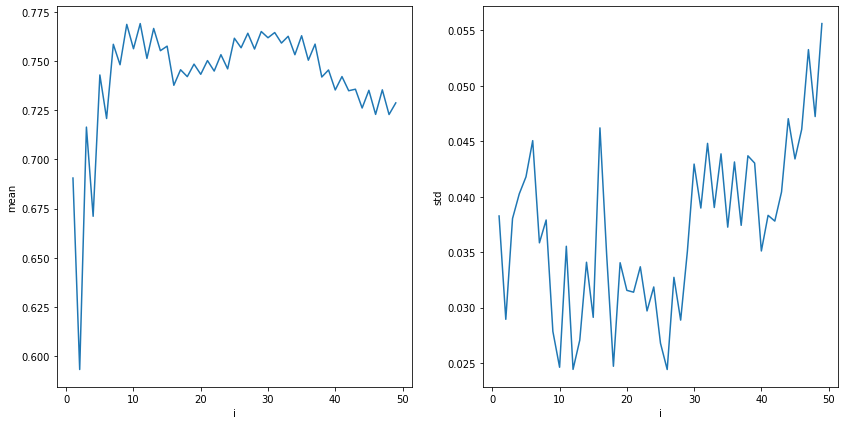

In [152]:
fig,ax=plt.subplots(1,2,figsize=(14,7))


sns.lineplot(data=df,y="mean",x="i",ax=ax[0])
sns.lineplot(data=df,y="std",x="i",ax=ax[1])

In [153]:
knn=KNN(n_neighbors=7)

knn.fit(X_train,y_train)

y_train_pred=knn.predict(X_train)
y_test_pred=knn.predict(X_test)

f1_score(y_train,y_train_pred),f1_score(y_test,y_test_pred)

(0.795992714025501, 0.7818181818181817)

### Decision Tree

In [174]:
from sklearn.tree import DecisionTreeClassifier

tree=DecisionTreeClassifier(random_state=30)

tree.fit(X_train,y_train)

y_train_pred=tree.predict(X_train)
y_test_pred=tree.predict(X_test)

f1_score(y_train,y_train_pred),f1_score(y_test,y_test_pred)

(1.0, 0.6786427145708583)

In [175]:
tree.get_depth()

17

In [176]:
tree.get_n_leaves()

218

### Changing CCP_APLHAS

In [180]:
path=tree.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

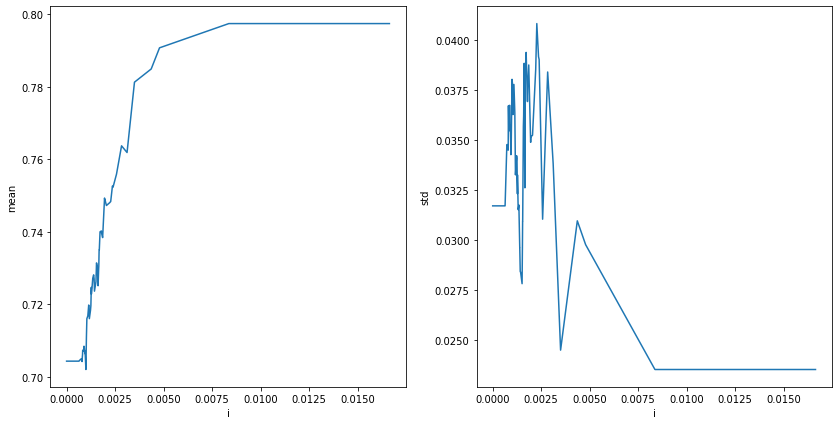

In [187]:
def val_score(alphas):
    
    avg=[]
    std=[]
    
    
    for i in alphas:
        score = cross_val_score(DecisionTreeClassifier(ccp_alpha=i,random_state=40),scoring='f1',X=X_train, y=y_train, cv=10)
        
        avg.append(score.mean())
        std.append(score.std())
        
    return avg,std

mean,std= val_score(ccp_alphas)
df=pd.DataFrame({"i":ccp_alphas,"mean":mean,"std":std})

fig,ax=plt.subplots(1,2,figsize=(14,7))
sns.lineplot(data=df,y="mean",x="i",ax=ax[0])
sns.lineplot(data=df,y="std",x="i",ax=ax[1])

In [191]:
from sklearn.tree import DecisionTreeClassifier

tree=DecisionTreeClassifier(random_state=30,ccp_alpha=0.008362)

tree.fit(X_train,y_train)

y_train_pred=tree.predict(X_train)
y_test_pred=tree.predict(X_test)

f1_score(y_train,y_train_pred),f1_score(y_test,y_test_pred)

(0.8003502626970228, 0.8007246376811594)

In [194]:
tree.get_depth()

2

### K-Fold Cross Validation across Max_depth

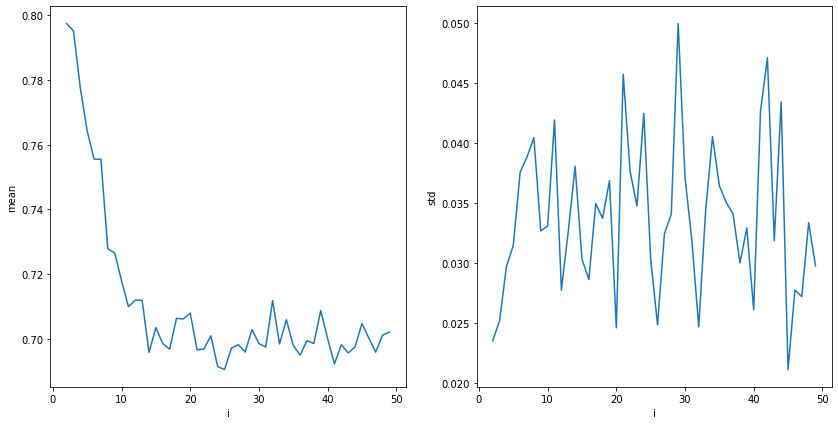

In [157]:
def val_score(depth):
    
    avg=[]
    std=[]
    
    
    for i in depth:
        score = cross_val_score(DecisionTreeClassifier(max_depth=i),scoring='f1',X=X_train, y=y_train, cv=10)
        
        avg.append(score.mean())
        std.append(score.std())
        
    return avg,std

mean,std= val_score(range(2,50))
df=pd.DataFrame({"i":range(2,50),"mean":mean,"std":std})

fig,ax=plt.subplots(1,2,figsize=(14,7))
sns.lineplot(data=df,y="mean",x="i",ax=ax[0])
sns.lineplot(data=df,y="std",x="i",ax=ax[1])

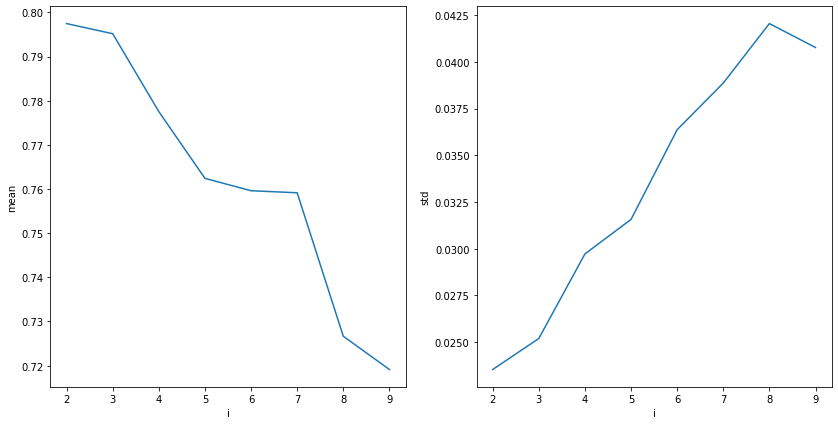

In [158]:
mean,std= val_score(range(2,10))
df=pd.DataFrame({"i":range(2,10),"mean":mean,"std":std})

fig,ax=plt.subplots(1,2,figsize=(14,7))
sns.lineplot(data=df,y="mean",x="i",ax=ax[0])
sns.lineplot(data=df,y="std",x="i",ax=ax[1])

In [163]:
from sklearn.tree import DecisionTreeClassifier

tree=DecisionTreeClassifier(max_depth=2,random_state=30)

tree.fit(X_train,y_train)

y_train_pred=tree.predict(X_train)
y_test_pred=tree.predict(X_test)

f1_score(y_train,y_train_pred),f1_score(y_test,y_test_pred)

(0.8003502626970228, 0.8007246376811594)

In [164]:
from sklearn import tree as tr

decision_tree = tr.export_graphviz(tree,out_file='tree.dot',feature_names=X_train.columns,max_depth=5,filled=True)

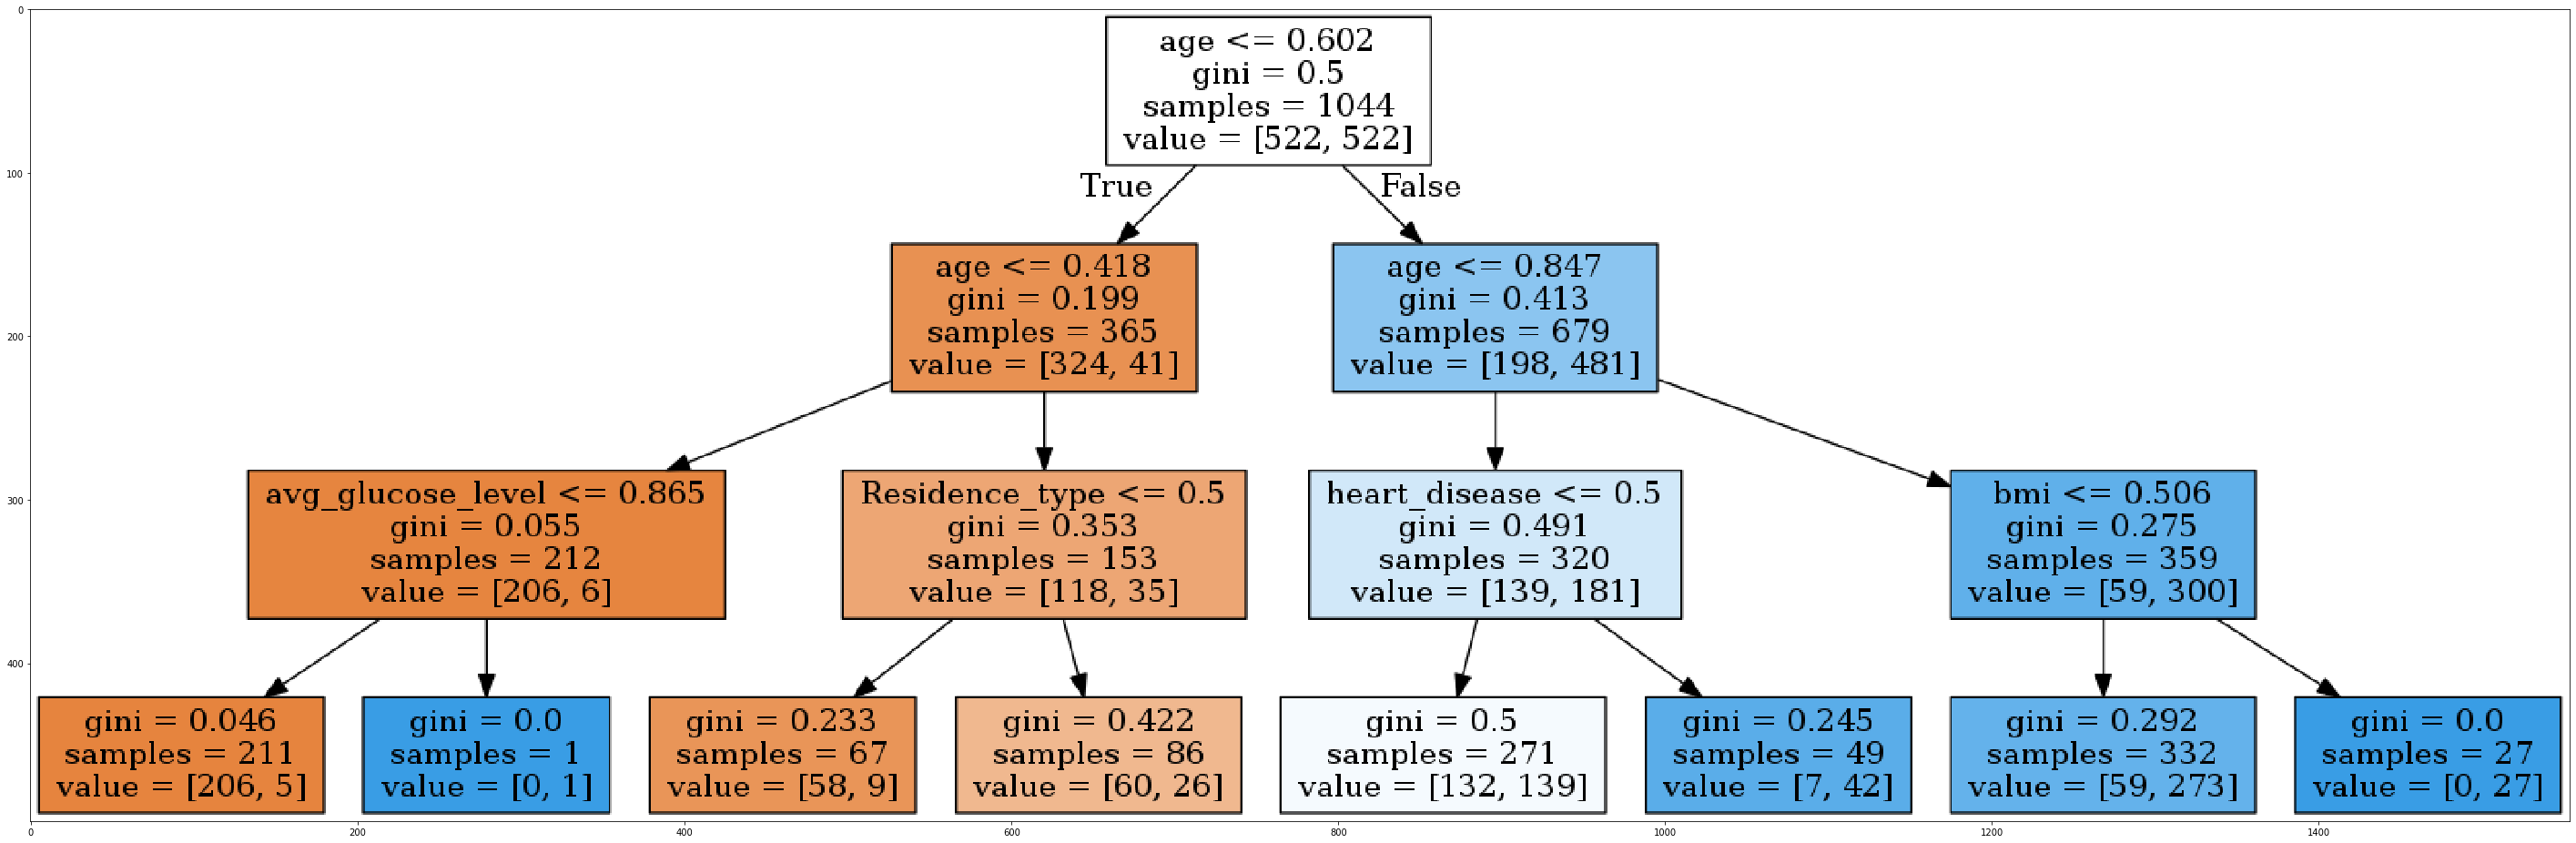

In [165]:
image = plt.imread('tree (2).png')
plt.figure(figsize=(50,50))
plt.imshow(image)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree=DecisionTreeClassifier(random_state=30)

tree.fit(X_train,y_train)

y_train_pred=tree.predict(X_train)
y_test_pred=tree.predict(X_test)

f1_score(y_train,y_train_pred),f1_score(y_test,y_test_pred)